In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\esthe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import missingno as msno

## EDA

In [5]:
df = pd.read_csv('C:\\Users\\esthe\\DSEI2100_Project\\fake_real_ML_project_dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   Content     44266 non-null  object
 2   Title       44898 non-null  object
 3   Type        44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Unnamed: 0
count,44898.00000
mean,22448.50000
std,12961.08053
min,0.00000
25%,11224.25000
50%,22448.50000
75%,33672.75000
max,44897.00000


In [8]:
df.isnull().sum()

Unnamed: 0      0
Content       632
Title           0
Type            0
dtype: int64

<Axes: >

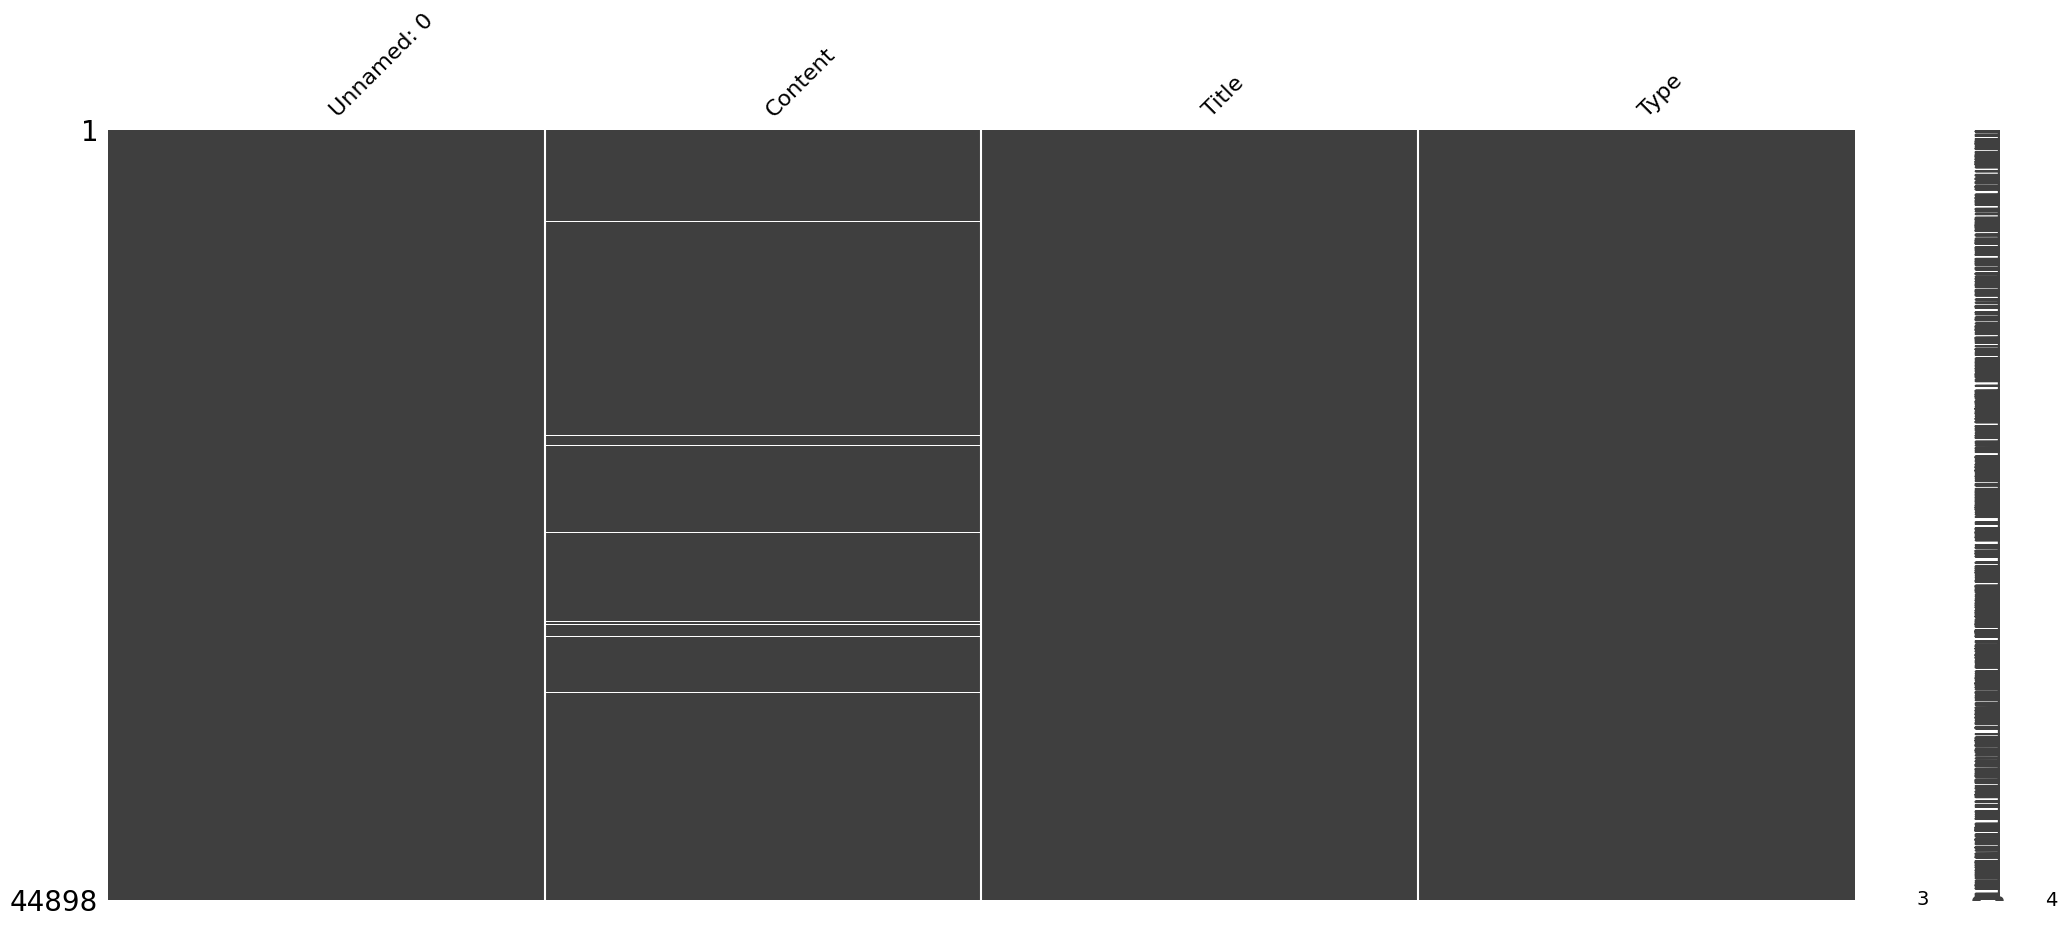

In [9]:
msno.matrix(df)

In [10]:
# drop about 600 empty rows
df = df.dropna()

In [11]:
df.shape

(44266, 4)

In [12]:
df.head()

,Unnamed: 0,Content,Title,Type
0,0,new york reuters us environmental group sierra...,politicsNews,true
1,1,washington reuters us air force asked industry...,politicsNews,true
2,2,saturday paul ryan posted photo instagram phot...,News,fake
3,3,america keeps waiting word hillary indicted ob...,politics,fake
4,4,religion peace ht weasel zippers,left-news,fake


In [13]:
# remove extra column
df = df.drop('Unnamed: 0', axis = 1)

In [14]:
df.head()

,Content,Title,Type
0,new york reuters us environmental group sierra...,politicsNews,true
1,washington reuters us air force asked industry...,politicsNews,true
2,saturday paul ryan posted photo instagram phot...,News,fake
3,america keeps waiting word hillary indicted ob...,politics,fake
4,religion peace ht weasel zippers,left-news,fake


In [15]:
# take a look at the first article
df['Content'].loc[0]

'new york reuters us environmental group sierra club asked environmental protection agency’s inspector general investigate whether agency’s head scott pruitt violated internal policies said believe carbon dioxide major contributor climate change according letter seen reuters wednesday lawyers sierra club wrote epa’s office inspector general tuesday asking independent watchdog check whether pruitt violated epa’s 2012 scientific integrity policy told cnbc interviewer march 9 “i would agree it’s primary contributor global warming see” request ramps tension us environmental movement administration president donald trump called global warming hoax meant weaken us economy packed cabinet people question science climate change overwhelming majority scientists think carbon dioxide emissions burning fossil fuels major contributor global climate change triggering sea level rise droughts frequent violent storms “it’s pretty unprecedented head epa contradicting basic scientific facts” sierra club s

In [16]:
# count how many are fake
df[df['Type'] == 'fake'].count()

Content    22850
Title      22850
Type       22850
dtype: int64

In [17]:
# count how many true
df[df['Type'] == 'true'].count()

Content    21416
Title      21416
Type       21416
dtype: int64

There are about the same amount of fake and true articles, which means there is no class imbalance to account for.

## Preprocessing

First, we apply typical steps of NLP to preprocess the text data and extract relevant features.

- Text Preprocessing: Tokenization, Normalization, Stopword Removal, Stemming, Lower Casing, Text Cleaning(e.g. HTML tags, special characters, or URLs)
- Feature Extraction: Bag of Words, TF-IDF

### Natural Language Tool Kit

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import treebank
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esthe\AppData\Roaming\nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esthe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenize the content and add it to a new corresponding column.

In [ ]:
df['Tokens'] = df['Content'].apply(lambda x: word_tokenize(x))

In [ ]:
df.head()

,Content,Title,Type,Tokens
0,new york reuters us environmental group sierra...,politicsNews,true,"[new, york, reuters, us, environmental, group,..."
1,washington reuters us air force asked industry...,politicsNews,true,"[washington, reuters, us, air, force, asked, i..."
2,saturday paul ryan posted photo instagram phot...,News,fake,"[saturday, paul, ryan, posted, photo, instagra..."
3,america keeps waiting word hillary indicted ob...,politics,fake,"[america, keeps, waiting, word, hillary, indic..."
4,religion peace ht weasel zippers,left-news,fake,"[religion, peace, ht, weasel, zippers]"


Compare Lemmatizer vs Stemming

- Lemmatizer converts words into their foundational form (brings context into words)
- Stemming (does not bring context into words)

This step will use the Lemmatizer.

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
type(df['Tokens'].loc[0])

list

In [ ]:
df['lem_toks_nltk'] = df['Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

Now let's see the changes that happened during lemmatization.

In [ ]:
print(df['Tokens'].loc[0])

['new', 'york', 'reuters', 'us', 'environmental', 'group', 'sierra', 'club', 'asked', 'environmental', 'protection', 'agency', '’', 's', 'inspector', 'general', 'investigate', 'whether', 'agency', '’', 's', 'head', 'scott', 'pruitt', 'violated', 'internal', 'policies', 'said', 'believe', 'carbon', 'dioxide', 'major', 'contributor', 'climate', 'change', 'according', 'letter', 'seen', 'reuters', 'wednesday', 'lawyers', 'sierra', 'club', 'wrote', 'epa', '’', 's', 'office', 'inspector', 'general', 'tuesday', 'asking', 'independent', 'watchdog', 'check', 'whether', 'pruitt', 'violated', 'epa', '’', 's', '2012', 'scientific', 'integrity', 'policy', 'told', 'cnbc', 'interviewer', 'march', '9', '“', 'i', 'would', 'agree', 'it', '’', 's', 'primary', 'contributor', 'global', 'warming', 'see', '”', 'request', 'ramps', 'tension', 'us', 'environmental', 'movement', 'administration', 'president', 'donald', 'trump', 'called', 'global', 'warming', 'hoax', 'meant', 'weaken', 'us', 'economy', 'packed', 

In [ ]:
print(df['lem_toks_nltk'].loc[0])

['new', 'york', 'reuters', 'u', 'environmental', 'group', 'sierra', 'club', 'asked', 'environmental', 'protection', 'agency', '’', 's', 'inspector', 'general', 'investigate', 'whether', 'agency', '’', 's', 'head', 'scott', 'pruitt', 'violated', 'internal', 'policy', 'said', 'believe', 'carbon', 'dioxide', 'major', 'contributor', 'climate', 'change', 'according', 'letter', 'seen', 'reuters', 'wednesday', 'lawyer', 'sierra', 'club', 'wrote', 'epa', '’', 's', 'office', 'inspector', 'general', 'tuesday', 'asking', 'independent', 'watchdog', 'check', 'whether', 'pruitt', 'violated', 'epa', '’', 's', '2012', 'scientific', 'integrity', 'policy', 'told', 'cnbc', 'interviewer', 'march', '9', '“', 'i', 'would', 'agree', 'it', '’', 's', 'primary', 'contributor', 'global', 'warming', 'see', '”', 'request', 'ramp', 'tension', 'u', 'environmental', 'movement', 'administration', 'president', 'donald', 'trump', 'called', 'global', 'warming', 'hoax', 'meant', 'weaken', 'u', 'economy', 'packed', 'cabine

This step will use the Stemming.

### Spacy

Now we can try to lemmatize with spacy.

In [ ]:
#pip install spacy

In [38]:
import spacy

In [ ]:
#!python -m spacy download en_core_web_sm

In [41]:
# load the english model
nlp = spacy.load('en_core_web_sm')

In [43]:
# process the text (takes much longer to run than nltk)
# df['lem_toks_spcy'] = df['Tokens'].apply(lambda tokens: [nlp(token) for token in tokens])

KeyboardInterrupt: 

Now to compare how the differences between lemmatization in spacy and nltk.

In [ ]:
df['lem_toks_spcy'].loc[0]

In [ ]:
df['lem_toks_nltk'].loc[0]

## Stemming

### NLTK

In [ ]:
ps = PorterStemmer()

### Spacy